## 1. Introdução às Séries Temporais
- Conceito e aplicações práticas  
- Estrutura dos dados temporais (timestamp, frequência, agregação)  
- Exemplos de contextos em engenharia e ciência de dados  

---

## 2. Estrutura e Componentes das Séries
- Tendência (trend)  
- Sazonalidade (seasonality)  
- Ciclo (cycle)  
- Resíduo (noise)  
- Decomposição aditiva e multiplicativa  

---

## 3. Estacionariedade e Pré-processamento
- Teste de estacionariedade (ADF, KPSS)  
- Diferenciação e transformações logarítmicas  
- Normalização e padronização  
- Separação treino-teste temporal  

---

## 4. Modelos Clássicos de Previsão

### 4.1 Modelo de Caminhada Aleatória (Random Walk) e Variações
- Random Walk simples  
- Random Walk com drift  
- Random Walk multiplicativo  

### 4.2 Modelos ARIMA e Box-Jenkins
- Identificação (ACF/PACF)  
- Estimação e diagnóstico  
- Extensão SARIMA (para sazonalidade)  

### 4.3 Suavização Exponencial e Holt-Winters
- Conceito de suavização exponencial simples  
- Holt linear (tendência)  
- Holt-Winters (tendência e sazonalidade)  

---

## 5. Modelos Computacionais Avançados

### 5.1 LSTM (Long Short-Term Memory)
- Estrutura e funcionamento da rede  
- Preparação de dados sequenciais  
- Avaliação de desempenho  

### 5.2 Prophet (opcional)
- Modelagem automática de tendência e sazonalidade  
- Ajuste e previsão de curto prazo  

---

## 6. Avaliação de Modelos
- Métricas de erro (MAE, RMSE, MAPE)  
- Validação temporal e análise de resíduos  
- Comparação entre modelos  

---

## 7. Aplicações e Discussões
- Interpretação dos resultados  
- Limitações e boas práticas de modelagem temporal  
- Extensões possíveis (CNN-LSTM, Transformers temporais, ensembles)  

---

## 8. Encerramento
- Síntese dos conceitos  
- Conexão com aprendizado supervisionado e predição temporal em IA  




---



# 1. Introdução às Séries Temporais

As séries temporais correspondem a sequências de observações coletadas ao longo do tempo, em intervalos regulares. Diferentemente de outros tipos de dados, sua principal característica é a dependência temporal, isto é, cada valor tende a refletir tanto as condições atuais quanto os eventos passados do fenômeno observado. Essa ordenação cronológica é fundamental para compreender o comportamento dinâmico de processos naturais, industriais, econômicos e sociais.

Em aplicações práticas, as séries temporais são amplamente utilizadas em contextos de engenharia e ciência de dados. O monitoramento contínuo de vibração em motores, a medição de temperatura em sistemas de controle térmico, a análise de consumo energético em plantas industriais e a observação de cotações financeiras ao longo do tempo são exemplos comuns. A análise desses dados permite identificar tendências, padrões sazonais, ciclos e possíveis anomalias que auxiliam na previsão e na tomada de decisão.

A estrutura básica de uma série temporal é composta por um carimbo de tempo (timestamp), uma frequência de amostragem e o valor observado. A consistência temporal é essencial, pois lacunas ou irregularidades na sequência podem comprometer a análise estatística e a modelagem preditiva. Visualizar uma série temporal é o primeiro passo para reconhecer seus comportamentos típicos, avaliar a presença de tendência e compreender o grau de variabilidade dos dados.



/tmp/ipython-input-4022076095.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dados = yf.download("PETR4.SA", start="2023-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


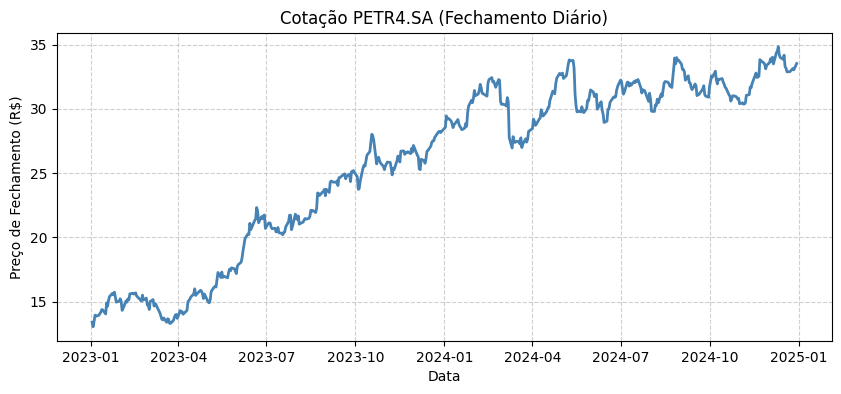

In [3]:
# Série Temporal de Análise Financeira

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Tenta carregar dados reais de uma ação (por exemplo, PETR4.SA)
try:
    import yfinance as yf
    dados = yf.download("PETR4.SA", start="2023-01-01", end="2025-01-01")
    serie = dados["Close"]
    titulo = "Cotação PETR4.SA (Fechamento Diário)"
except Exception:
    # Caso não haja conexão, gera uma série sintética
    np.random.seed(42)
    datas = pd.date_range("2023-01-01", periods=500, freq="B")
    serie = pd.Series(50 + np.cumsum(np.random.normal(0, 1, len(datas))), index=datas)
    titulo = "Série Sintética Financeira (Simulada)"

# Plotagem
plt.figure(figsize=(10, 4))
plt.plot(serie, color='steelblue', linewidth=2)
plt.title(titulo)
plt.xlabel("Data")
plt.ylabel("Preço de Fechamento (R$)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


# 2. Estrutura e Componentes das Séries Temporais

A análise de uma série temporal inicia-se pela identificação de seus componentes fundamentais. Compreender a estrutura interna da série é essencial para escolher adequadamente os métodos de modelagem e previsão. Em geral, uma série pode ser decomposta em quatro partes principais: **tendência**, **sazonalidade**, **ciclo** e **resíduo (ou ruído)**. Cada um desses elementos representa um tipo distinto de comportamento e possui implicações diretas no desempenho dos modelos estatísticos e computacionais.

A **tendência** representa o movimento de longo prazo dos dados, podendo indicar crescimento, declínio ou estabilidade ao longo do tempo. Por exemplo, o aumento gradual do consumo de energia em uma planta industrial ou o crescimento do preço de uma ação refletem tendências ascendentes. Visualmente, uma tendência é observada quando os valores médios se deslocam consistentemente em uma direção. Em termos de modelagem, a presença de tendência pode prejudicar algoritmos que assumem estacionariedade, como ARIMA, regressões lineares simples e métodos baseados em média móvel. Em tais casos, é necessário aplicar a **diferenciação** (subtração do valor atual pelo anterior) ou o **ajuste de regressão linear** para remover a componente tendencial.

A **sazonalidade** corresponde a padrões que se repetem em intervalos regulares de tempo, como dias, meses ou anos. Em sistemas industriais, pode ocorrer sazonalidade diária ou semanal associada a turnos de operação; em finanças, há padrões de aumento e queda de preços conforme ciclos econômicos. A sazonalidade deve ser identificada e tratada, pois influencia fortemente as previsões. Modelos como Holt-Winters e SARIMA lidam bem com dados sazonais, enquanto redes neurais e árvores de decisão podem incorporá-la se o conjunto de dados for adequadamente estruturado (por exemplo, incluindo o mês, dia da semana ou hora como variáveis explicativas).

O **componente cíclico** representa oscilações de médio e longo prazo que não seguem uma periodicidade fixa, muitas vezes associadas a fatores econômicos ou operacionais. Diferente da sazonalidade, o ciclo é irregular e, por isso, mais difícil de modelar. Técnicas de suavização exponencial e redes LSTM são capazes de capturar variações cíclicas sem a necessidade de um período definido, desde que haja volume de dados suficiente para representar essas flutuações.

Por fim, o **resíduo** ou **ruído** é a parcela da série que não pode ser explicada pelos componentes anteriores. Ele representa variações aleatórias e deve ser analisado para verificar se o modelo capturou corretamente as estruturas principais. Um bom modelo gera resíduos distribuídos de forma aproximadamente aleatória, sem padrão visível. Resíduos sistemáticos indicam que há estrutura não explicada — o que exige reavaliação do modelo ou inclusão de variáveis adicionais.

A seguir, realiza-se a decomposição estatística da série temporal, que separa graficamente cada componente e auxilia na análise inicial do comportamento dos dados.


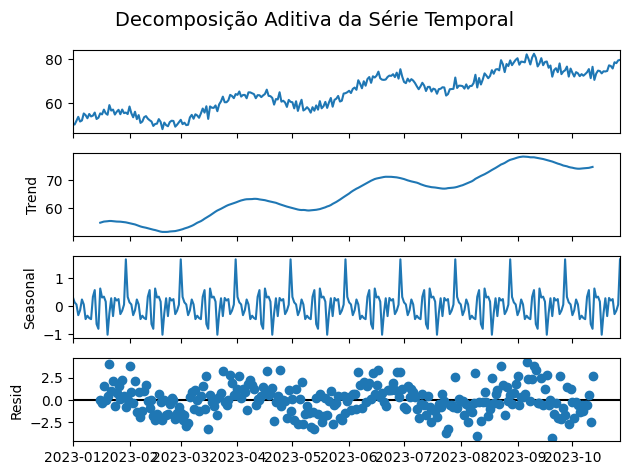

In [4]:
# Decomposição da série temporal e análise dos componentes

from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Caso não tenha série anterior, gera uma série sintética
np.random.seed(42)
datas = pd.date_range("2023-01-01", periods=300, freq="D")
serie = pd.Series(50 + 0.1*np.arange(300) + 5*np.sin(np.arange(300)/12) + np.random.normal(0, 1.5, 300), index=datas)

# Decomposição aditiva
decomposicao = seasonal_decompose(serie, model='additive', period=30)
decomposicao.plot()
plt.suptitle("Decomposição Aditiva da Série Temporal", fontsize=14)
plt.tight_layout()
plt.show()


A decomposição exibe quatro gráficos principais:

- **Série original:** comportamento global dos dados.
- **Tendência:** variação suave e de longo prazo.
- **Sazonalidade:** flutuação periódica de curto ou médio prazo.
- **Resíduo:** componente aleatório, idealmente sem padrão visível.

Quando a tendência ou a sazonalidade são muito acentuadas, a série é dita **não estacionária**, isto é, suas propriedades estatísticas mudam ao longo do tempo. A não estacionariedade prejudica modelos lineares como ARIMA, que exigem média e variância constantes. Para corrigir, podem ser aplicadas transformações logarítmicas (para reduzir amplitude) e diferenciação (para estabilizar a média).

Por outro lado, modelos baseados em aprendizado de máquina, como LSTM, Random Forest ou Gradient Boosting, não exigem estacionariedade explícita, embora se beneficiem de séries normalizadas. A normalização (por exemplo, `MinMaxScaler` ou `StandardScaler`) melhora a estabilidade numérica e acelera o treinamento de modelos neurais. Já algoritmos baseados em distância, como KNN e SVM, também exigem normalização para evitar distorções nos cálculos de similaridade.

Em síntese, o tratamento adequado dos componentes da série (principalmente a remoção de tendências e ajuste de sazonalidade) é um passo essencial para garantir previsões confiáveis e comparáveis entre diferentes modelos.




---



# 3. Estacionariedade e Pré-processamento de Séries Temporais

Antes de aplicar qualquer modelo preditivo, é necessário verificar se a série é **estacionária**, isto é, se suas propriedades estatísticas (média, variância e covariância) permanecem constantes ao longo do tempo.  
Modelos lineares clássicos, como **ARIMA**, pressupõem estacionariedade, enquanto abordagens baseadas em aprendizado profundo (como **LSTM**) toleram variações, mas se beneficiam de séries suavizadas e normalizadas.

A seguir, são apresentadas três transformações comuns: diferenciação, transformação logarítmica e normalização. Cada etapa inclui a visualização da série antes e depois da operação e a interpretação de seus efeitos.


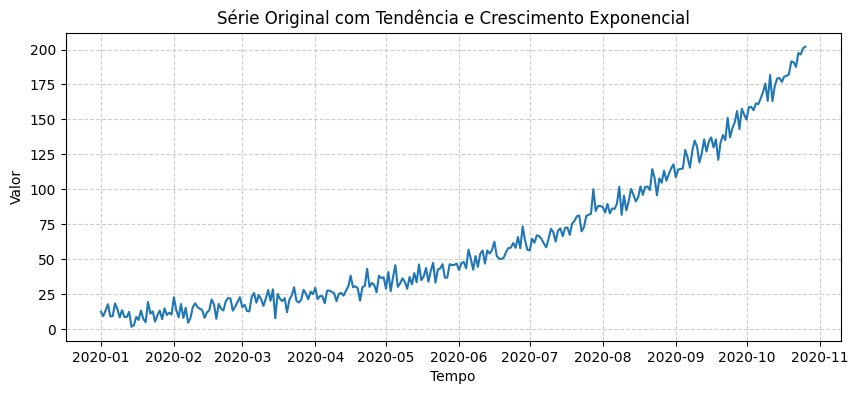

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler

# Série com tendência e crescimento exponencial simulada
np.random.seed(42)
datas = pd.date_range("2020-01-01", periods=300, freq="D")
serie = pd.Series(10 * np.exp(0.01*np.arange(300)) + np.random.normal(0, 5, 300), index=datas)

plt.figure(figsize=(10,4))
plt.plot(serie)
plt.title("Série Original com Tendência e Crescimento Exponencial")
plt.xlabel("Tempo")
plt.ylabel("Valor")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


A série original apresenta tendência clara e amplitude crescente -> características típicas de **não estacionariedade**.  
Essas propriedades podem gerar erros acumulados em modelos lineares e comprometer a interpretação de autocorrelação.  
O primeiro passo é testar a estacionariedade utilizando o **teste de Dickey-Fuller Aumentado (ADF)**.


In [6]:
resultado = adfuller(serie)
print(f"Estatística ADF: {resultado[0]:.3f}")
print(f"Valor-p: {resultado[1]:.3f}")


Estatística ADF: 6.757
Valor-p: 1.000


Se o p-value for **maior que 0,05**, a hipótese nula de não estacionariedade é aceita.  
Neste caso, a série requer tratamento antes da modelagem.


## 3.1 Diferenciação

A diferenciação remove a tendência linear subtraindo de cada valor o seu antecessor.  
É uma das formas mais diretas de estabilizar a média da série.


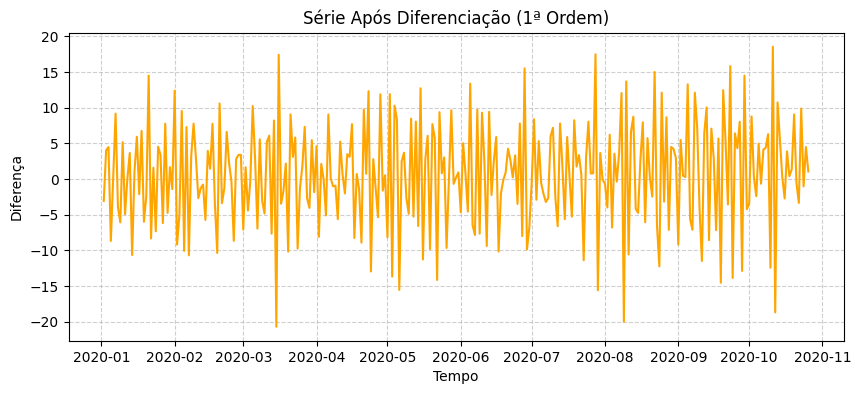

Valor-p após diferenciação: 0.0000


In [7]:
serie_diff = serie.diff().dropna()

plt.figure(figsize=(10,4))
plt.plot(serie_diff, color="orange")
plt.title("Série Após Diferenciação (1ª Ordem)")
plt.xlabel("Tempo")
plt.ylabel("Diferença")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Novo teste ADF
resultado_diff = adfuller(serie_diff)
print(f"Valor-p após diferenciação: {resultado_diff[1]:.4f}")


A série diferenciada tende a oscilar em torno de uma média estável, com variância mais constante.  
Quando o valor-p cai abaixo de **0,05**, considera-se a série estacionária.  
Modelos **ARIMA(p,1,q)** e **SARIMA** incorporam essa operação automaticamente.  
Em contrapartida, algoritmos que dependem da escala original dos dados (como redes neurais) exigem que essa transformação seja revertida na fase de previsão.


## 3.2 Transformação Logarítmica

Em séries com **crescimento exponencial** ou **variância crescente**, a transformação logarítmica suaviza picos e estabiliza a amplitude.  
Ela é útil quando a variância aumenta proporcionalmente ao valor médio.


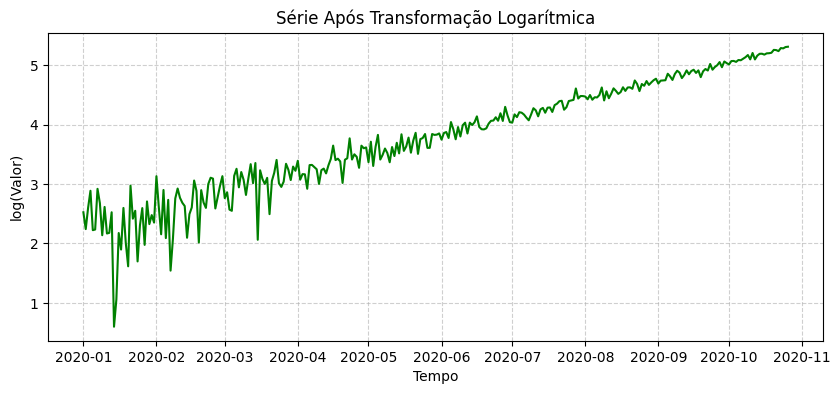

In [8]:
serie_log = np.log(serie)

plt.figure(figsize=(10,4))
plt.plot(serie_log, color="green")
plt.title("Série Após Transformação Logarítmica")
plt.xlabel("Tempo")
plt.ylabel("log(Valor)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


Após aplicar o logaritmo, os valores extremos tornam-se menos dominantes, o que melhora o ajuste de modelos lineares.  
Entretanto, essa técnica **não deve ser usada em séries que contêm valores zero ou negativos**, pois o logaritmo não é definido nesses casos.  
Modelos como **Holt-Winters** e **ARIMA** costumam apresentar desempenho superior após essa estabilização.


## 3.3 Normalização e Padronização

Para algoritmos baseados em distância ou gradiente (como **KNN**, **SVM** e **LSTM**), a escala dos dados influencia diretamente o aprendizado.  
Por isso, a normalização (ajuste entre 0 e 1) ou a padronização (média 0 e desvio 1) são etapas fundamentais.


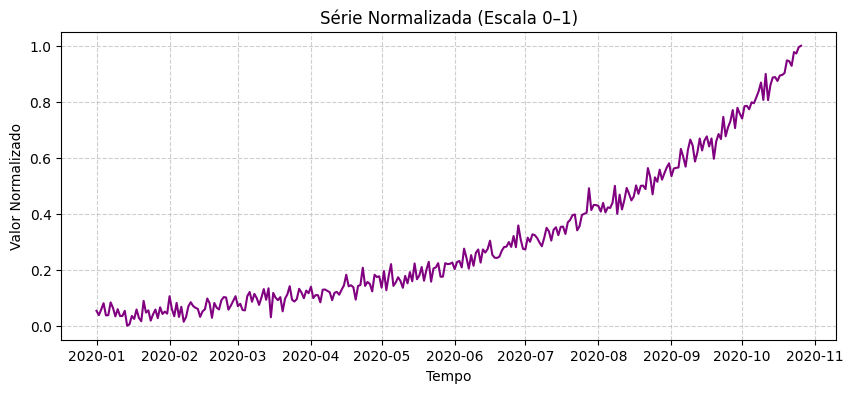

In [9]:
scaler = MinMaxScaler()
serie_norm = pd.Series(scaler.fit_transform(serie.values.reshape(-1,1)).flatten(), index=serie.index)

plt.figure(figsize=(10,4))
plt.plot(serie_norm, color="purple")
plt.title("Série Normalizada (Escala 0–1)")
plt.xlabel("Tempo")
plt.ylabel("Valor Normalizado")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


A normalização coloca todos os valores dentro de um intervalo fixo, evitando que variações de grande magnitude dominem o processo de aprendizado.  
Esse passo é especialmente importante para redes neurais e métodos baseados em otimização numérica.  
Modelos estatísticos clássicos, como ARIMA e Holt-Winters, **não exigem normalização**, pois já trabalham com diferenças relativas entre valores.


Em síntese, o pré-processamento adequado transforma séries temporais em representações mais estáveis e previsíveis.  
A escolha da técnica depende do modelo a ser aplicado:

| Tipo de modelo | Requer estacionariedade? | Beneficia-se de normalização? |
|----------------|--------------------------|-------------------------------|
| ARIMA / SARIMA | Sim                      | Não obrigatório               |
| Holt-Winters   | Moderado                 | Não obrigatório               |
| LSTM / RNN     | Não                      | Sim                           |
| SVM / KNN      | Não                      | Sim                           |

Com a série tratada, o próximo passo é selecionar e ajustar os **modelos de previsão**, avaliando sua capacidade de capturar tendência, sazonalidade e padrões residuais.




---



# 4. Modelos Clássicos de Previsão de Séries Temporais

Uma vez tratada e estabilizada a série, o passo seguinte é aplicar modelos capazes de realizar previsões.  
Os **modelos clássicos** baseiam-se em relações temporais entre os próprios valores da série — ou seja, usam o passado para estimar o futuro.  
Nesta seção, são explorados três abordagens fundamentais: **Random Walk**, **ARIMA (Box-Jenkins)** e **Holt-Winters**.

## 4.1 Random Walk (Caminhada Aleatória)

O modelo de **caminhada aleatória** assume que o melhor preditor do próximo valor é o último observado.  
Formalmente, ele é definido como:

$$
y_t = y_{t-1} + \varepsilon_t
$$

onde $\varepsilon_t$ é um ruído aleatório. Esse modelo é extremamente simples e serve como **referência (baseline)** para avaliar se modelos mais sofisticados realmente agregam valor.


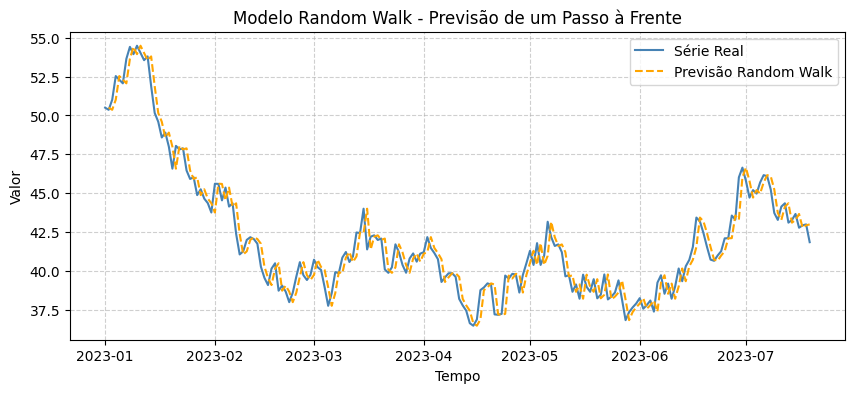

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Série sintética com ruído e leve tendência
np.random.seed(42)
t = pd.date_range("2023-01-01", periods=200, freq="D")
serie = pd.Series(np.cumsum(np.random.normal(0, 1, len(t))) + 50, index=t)

# Previsão de Random Walk (valor anterior como previsão)
previsao_rw = serie.shift(1)

plt.figure(figsize=(10,4))
plt.plot(serie, label="Série Real", color="steelblue")
plt.plot(previsao_rw, label="Previsão Random Walk", color="orange", linestyle="--")
plt.title("Modelo Random Walk - Previsão de um Passo à Frente")
plt.xlabel("Tempo")
plt.ylabel("Valor")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


Visualmente, o modelo acompanha a série com um atraso de uma observação.  
Embora rudimentar, ele serve como **modelo base** para comparação: se um método complexo não supera o Random Walk, ele provavelmente não está captando estrutura significativa. Esse modelo é útil quando a série é altamente aleatória e sem tendência aparente.


## 4.2 ARIMA (Box-Jenkins)

O modelo **ARIMA** (AutoRegressive Integrated Moving Average) combina três componentes:

- **AR (Auto-Regressivo)**: relação entre o valor atual e valores passados.  
- **I (Integrated)**: número de diferenciações aplicadas para alcançar estacionariedade.  
- **MA (Média Móvel)**: dependência entre o valor atual e erros anteriores.

Sua formulação é indicada por ARIMA(p, d, q), onde:
- **p** representa a ordem autorregressiva,
- **d** o número de diferenciações aplicadas,
- **q** o número de termos de média móvel.


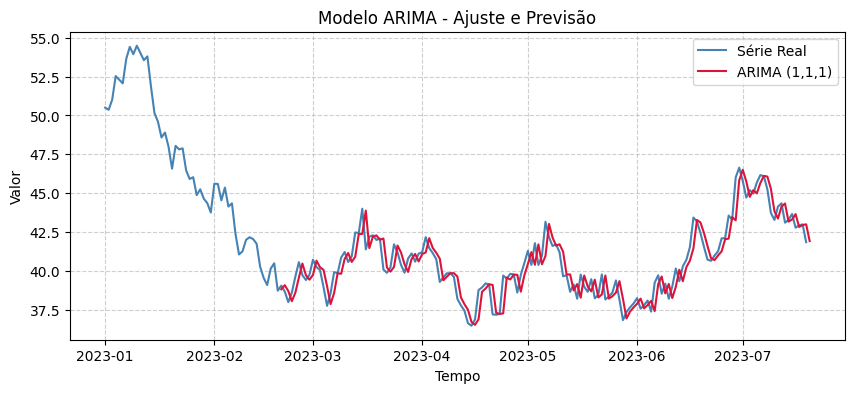

In [13]:
from statsmodels.tsa.arima.model import ARIMA

# Modelo ARIMA simples (p=1, d=1, q=1)
modelo_arima = ARIMA(serie, order=(1,1,1))
ajuste_arima = modelo_arima.fit()

# Previsões dentro do conjunto
previsoes = ajuste_arima.predict(start=50, end=200)

plt.figure(figsize=(10,4))
plt.plot(serie, label="Série Real", color="steelblue")
plt.plot(previsoes, label="ARIMA (1,1,1)", color="crimson")
plt.title("Modelo ARIMA - Ajuste e Previsão")
plt.xlabel("Tempo")
plt.ylabel("Valor")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


O ARIMA é um dos modelos mais robustos para séries estacionárias.  
Ele captura dependências lineares e efeitos de ruído de curto prazo, mas apresenta limitações diante de relações não lineares ou padrões complexos.  
Por isso, é frequentemente utilizado como **modelo de referência estatístico** em comparação com abordagens de aprendizado de máquina.

Quando a série apresenta **sazonalidade**, utiliza-se a extensão **SARIMA**, que adiciona termos sazonais (p, d, q, P, D, Q, s).  

O processo de ajuste segue o **método Box-Jenkins**, que envolve três etapas:
1. **Identificação:** análise dos gráficos de autocorrelação (ACF) e autocorrelação parcial (PACF);  
2. **Estimação:** ajuste dos parâmetros p, d, q;  
3. **Diagnóstico:** verificação dos resíduos (devem ser ruído branco).  

O objetivo é capturar a estrutura temporal da série com o menor número possível de parâmetros, mantendo-a interpretável e eficiente.

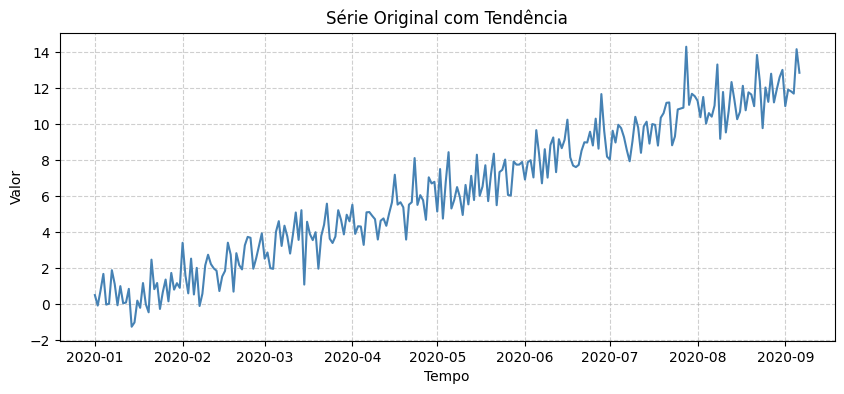

Valor-p: 0.9583


In [14]:
# Exemplo prático: aplicação do método Box-Jenkins passo a passo

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

# Série com tendência e ruído
np.random.seed(42)
t = pd.date_range("2020-01-01", periods=250, freq="D")
serie = pd.Series(0.05*np.arange(250) + np.random.normal(0, 1, 250), index=t)

plt.figure(figsize=(10,4))
plt.plot(serie, color="steelblue")
plt.title("Série Original com Tendência")
plt.xlabel("Tempo")
plt.ylabel("Valor")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

resultado = adfuller(serie)
print(f"Valor-p: {resultado[1]:.4f}")



A série apresenta uma tendência ascendente clara.  
Como o modelo ARIMA exige estacionariedade, o primeiro passo é verificar essa propriedade com o **teste de Dickey-Fuller aumentado (ADF)**.

O valor-p tende a ser maior que 0,05, indicando **não estacionariedade**.  
Aplica-se então a **diferenciação** de primeira ordem para remover a tendência.


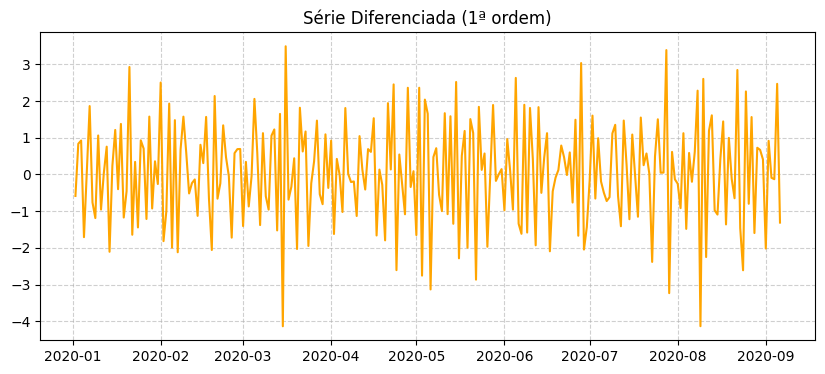

Valor-p após diferenciação: 0.0000


In [15]:
serie_diff = serie.diff().dropna()

plt.figure(figsize=(10,4))
plt.plot(serie_diff, color="orange")
plt.title("Série Diferenciada (1ª ordem)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Teste novamente
resultado_diff = adfuller(serie_diff)
print(f"Valor-p após diferenciação: {resultado_diff[1]:.4f}")


Após a diferenciação, a série tende a oscilar em torno de uma média constante, o que caracteriza estacionariedade.  

Agora inicia-se a **etapa de identificação** dos parâmetros p e q.


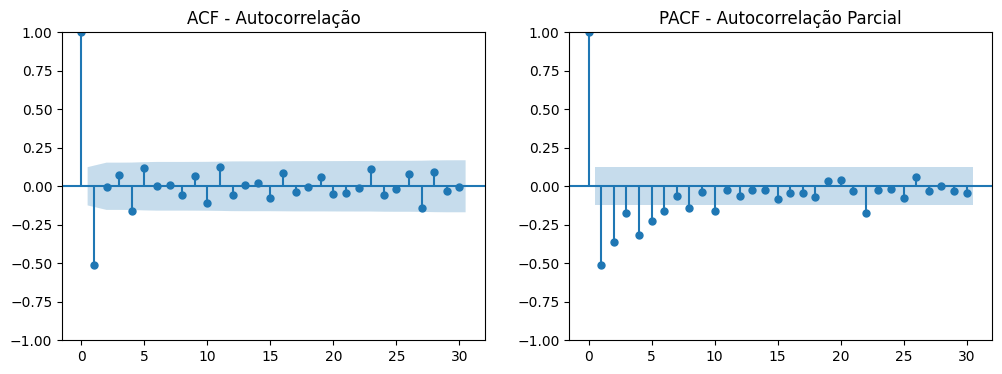

In [ ]:
# Análise de autocorrelação e autocorrelação parcial
fig, axes = plt.subplots(1, 2, figsize=(12,4))
plot_acf(serie_diff, ax=axes[0], lags=30)
plot_pacf(serie_diff, ax=axes[1], lags=30)
axes[0].set_title("ACF - Autocorrelação")
axes[1].set_title("PACF - Autocorrelação Parcial")
plt.show()


- O gráfico **ACF** mostra a influência dos termos de média móvel (MA).  
- O gráfico **PACF** mostra a influência dos termos autorregressivos (AR).  

Picos significativos nos primeiros lags indicam os valores prováveis de **p** e **q**.  

Por exemplo, se o PACF corta bruscamente após o lag 1 e o ACF decai gradualmente, o modelo **ARIMA(1,1,1)** é uma boa hipótese inicial. Quando usamos **ARIMA(1,1,1)**, estamos dizendo o seguinte:

- **1º número (p=1)**: a série depende apenas do valor imediatamente anterior.  
- **2º número (d=1)**: aplicamos uma **diferenciação**, ou seja, analisamos as variações entre dias em vez dos valores brutos (para eliminar a tendência).  
- **3º número (q=1)**: consideramos também o **erro da previsão anterior** para suavizar o resultado.

Em outras palavras:

> O ARIMA(1,1,1) prevê o próximo valor com base na última variação observada **e** no erro que o modelo cometeu no passo anterior.

O ARIMA(1,1,1) é um **modelo inicial padrão** porque:
- É simples, mas já combina todas as partes do ARIMA.  
- Capta dependências curtas (AR), suaviza ruídos (MA) e remove tendência (I).  
- Serve como linha de base para comparar com outros modelos mais complexos, como (2,1,1) ou (1,1,2).

Em geral, testamos diferentes combinações e escolhemos aquela com o **menor erro de previsão (ou menor AIC)**.



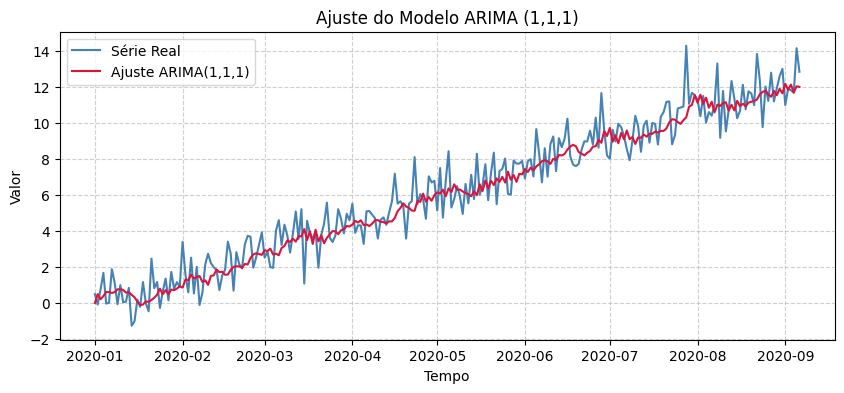

In [20]:
# Etapa de estimação: ajuste do modelo ARIMA
modelo_arima = ARIMA(serie, order=(2,1,2))
ajuste = modelo_arima.fit()

plt.figure(figsize=(10,4))
plt.plot(serie, label="Série Real", color="steelblue")
plt.plot(ajuste.predict(), label="Ajuste ARIMA(1,1,1)", color="crimson")
plt.title("Ajuste do Modelo ARIMA (1,1,1)")
plt.xlabel("Tempo")
plt.ylabel("Valor")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


Observe que o modelo acompanha bem a tendência geral da série e suaviza oscilações aleatórias.  
Ele não tenta prever cada variação isolada, mas o **comportamento geral** — é isso que o torna estável e útil para previsões curtas.

Quando a série apresenta dependências mais longas (por exemplo, o valor de hoje depende do de dois ou três dias atrás), aumentamos o valor de **p**.  
Quando os erros anteriores ainda influenciam o resultado, aumentamos **q**.  
Mas o **(1,1,1)** já é o ponto de partida mais equilibrado para séries com leve tendência e ruído moderado.

O modelo ajusta a série suavizando oscilações e reduzindo a variabilidade de curto prazo.  
A seguir, realiza-se a **análise de resíduos**, que corresponde à etapa de diagnóstico.


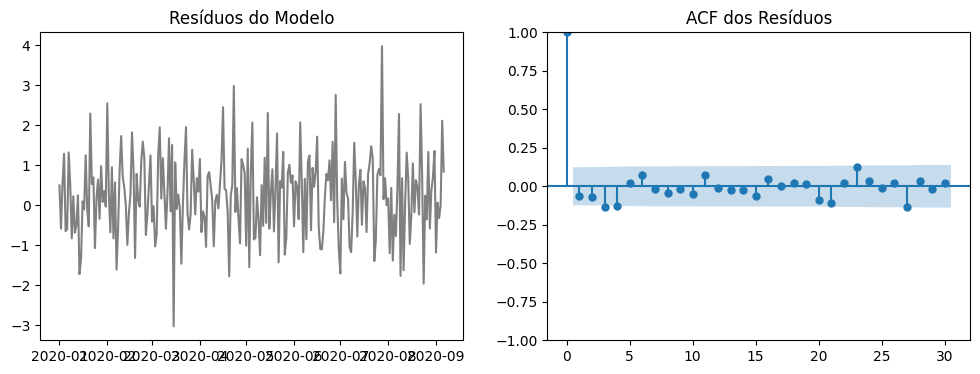

In [21]:
residuos = ajuste.resid

fig, axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].plot(residuos, color="gray")
axes[0].set_title("Resíduos do Modelo")
plot_acf(residuos, ax=axes[1], lags=30)
axes[1].set_title("ACF dos Resíduos")
plt.show()


Um bom modelo apresenta resíduos distribuídos de forma aleatória, com autocorrelações próximas de zero.  
Se forem observados padrões ou correlações significativas, o modelo deve ser reavaliado — ajustando os parâmetros **p** e **q** ou aumentando o grau de diferenciação.

A metodologia Box-Jenkins, portanto, é um processo iterativo:  
1. Diferenciar até atingir estacionariedade;  
2. Inspecionar ACF/PACF para definir p e q;  
3. Ajustar o modelo e verificar resíduos;  
4. Repetir até alcançar resíduos não correlacionados.

Esse procedimento garante um modelo estatisticamente consistente e interpretável, servindo como base sólida antes de migrar para abordagens computacionais mais complexas.


## 4.3 Holt-Winters (Suavização Exponencial)

A **suavização exponencial** é uma técnica que pondera mais fortemente as observações recentes, mas sem descartar o passado.  
A variação **Holt-Winters** estende o método para lidar com **tendência** e **sazonalidade** simultaneamente.

Existem três versões principais:
- **Simples:** apenas nível;
- **Holt linear:** nível + tendência;
- **Holt-Winters:** nível + tendência + sazonalidade.


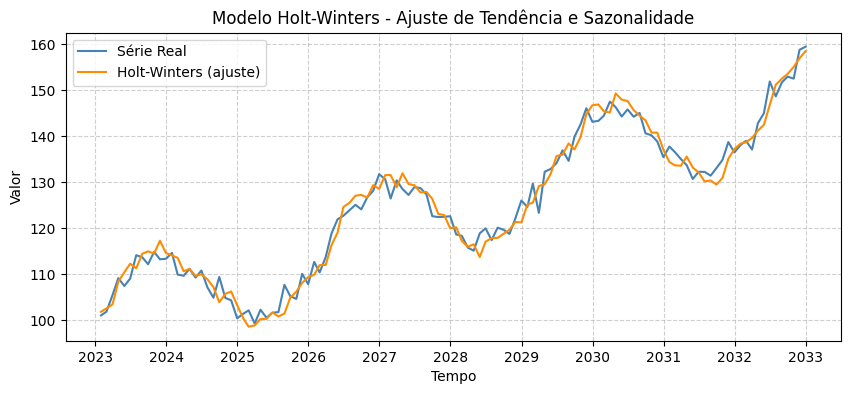

In [22]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Série com tendência e sazonalidade simulada
np.random.seed(42)
t = pd.date_range("2023-01-01", periods=120, freq="ME")
serie_hw = pd.Series(100 + 5*np.arange(120)/12 + 10*np.sin(np.arange(120)/6) + np.random.normal(0, 2, 120), index=t)

modelo_hw = ExponentialSmoothing(serie_hw, trend="add", seasonal="add", seasonal_periods=12)
ajuste_hw = modelo_hw.fit()

plt.figure(figsize=(10,4))
plt.plot(serie_hw, label="Série Real", color="steelblue")
plt.plot(ajuste_hw.fittedvalues, label="Holt-Winters (ajuste)", color="darkorange")
plt.title("Modelo Holt-Winters - Ajuste de Tendência e Sazonalidade")
plt.xlabel("Tempo")
plt.ylabel("Valor")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


O modelo Holt-Winters adapta-se bem a séries com **padrões sazonais regulares**, sendo amplamente usado em contextos industriais e comerciais.  
Por não exigir estacionariedade, é adequado quando há tendência clara e sazonalidade estável.

No entanto, se a sazonalidade for irregular ou o ciclo mudar ao longo do tempo, o desempenho se reduz. Nesses casos, modelos baseados em aprendizado de máquina (como LSTM) podem oferecer resultados mais consistentes.

Em síntese:
| Modelo | Exige Estacionariedade | Lida com Sazonalidade | Complexidade | Tipo de Relação |
|---------|------------------------|------------------------|---------------|----------------|
| Random Walk | Não | Não | Baixa | Nenhuma (baseline) |
| ARIMA | Sim | Parcial (SARIMA) | Média | Linear |
| Holt-Winters | Não | Sim | Média | Linear |

A análise comparativa desses modelos fornece um ponto de partida sólido para a escolha de abordagens mais complexas, como redes neurais ou modelos híbridos.




---



# 5. Modelos Computacionais Avançados: LSTM e Prophet

Os modelos clássicos, como ARIMA e Holt-Winters, são muito eficazes para séries lineares e com padrões regulares.  
Entretanto, quando os dados apresentam **comportamentos não lineares**, **mudanças de tendência**, **eventos externos** ou **dependências de longo prazo**, torna-se necessário utilizar abordagens mais flexíveis.  

Nesta seção são apresentados dois métodos amplamente aplicados em ciência de dados:

1. **LSTM (Long Short-Term Memory)** – uma rede neural recorrente capaz de aprender padrões complexos e não lineares em séries temporais;  
2. **Prophet** – uma ferramenta automatizada de modelagem temporal desenvolvida pela Meta, que combina decomposição estatística e ajuste de tendência e sazonalidade de forma intuitiva.

## 5.1 LSTM – Redes Neurais para Séries Temporais

As redes **LSTM** (Long Short-Term Memory) são um tipo de rede neural recorrente que processa dados sequenciais, mantendo “memória” de estados anteriores.  
Elas foram projetadas para aprender dependências de longo prazo sem sofrer com o problema do esquecimento, comum em redes recorrentes simples.

Na prática, a LSTM aprende diretamente dos dados — ela **não exige estacionariedade** e **não precisa de diferenciação**.  
Isso a torna poderosa para séries que misturam tendência, sazonalidade e ruído, como dados industriais, ambientais ou financeiros.

Antes de treinar o modelo, são necessárias duas etapas fundamentais:
- **Normalizar** os valores (as redes são sensíveis à escala dos dados);  
- **Gerar janelas temporais**, ou seja, transformar a sequência em pares entrada–saída (por exemplo, usar os 10 últimos dias para prever o próximo valor).


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
=== Desempenho LSTM ===
MAE  : 1.192
RMSE : 1.476
MAPE : 1.53%


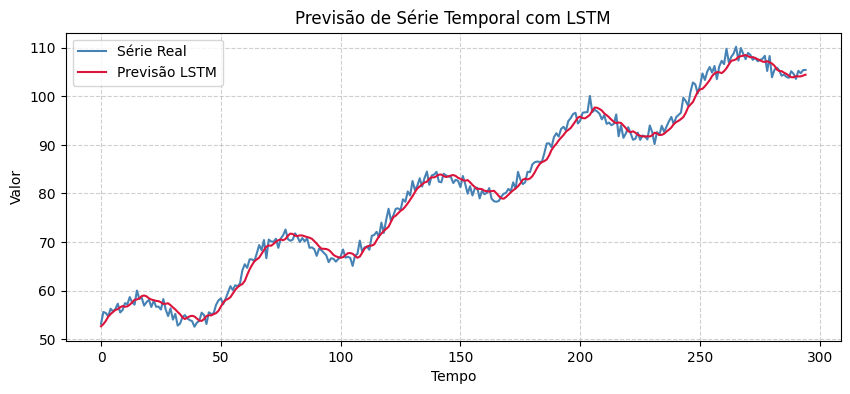

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Série simulada com tendência e sazonalidade
np.random.seed(42)
t = np.arange(300)
serie = 50 + 0.2*t + 5*np.sin(t/10) + np.random.normal(0, 1, 300)
serie = pd.Series(serie)

# Normalização
scaler = MinMaxScaler()
serie_norm = scaler.fit_transform(serie.values.reshape(-1,1))

# Criação das janelas (10 valores passados -> 1 previsão)
X, y = [], []
janela = 5
for i in range(janela, len(serie_norm)):
    X.append(serie_norm[i-janela:i])
    y.append(serie_norm[i])
X, y = np.array(X), np.array(y)

# Modelo LSTM
model = Sequential([
    LSTM(450, activation="tanh", input_shape=(X.shape[1], 1)),
    Dense(1)
])
model.compile(optimizer="adam", loss="mse")
model.fit(X, y, epochs=150, verbose=0)

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Previsões
y_pred = model.predict(X)
y_pred_inv = scaler.inverse_transform(y_pred)
y_inv = scaler.inverse_transform(y)

mae_lstm = mean_absolute_error(y_inv, y_pred_inv)
rmse_lstm = np.sqrt(mean_squared_error(y_inv, y_pred_inv))
mape_lstm = mape(y_inv, y_pred_inv)

print("=== Desempenho LSTM ===")
print(f"MAE  : {mae_lstm:.3f}")
print(f"RMSE : {rmse_lstm:.3f}")
print(f"MAPE : {mape_lstm:.2f}%")

plt.figure(figsize=(10,4))
plt.plot(y_inv, label="Série Real", color="steelblue")
plt.plot(y_pred_inv, label="Previsão LSTM", color="crimson")
plt.title("Previsão de Série Temporal com LSTM")
plt.xlabel("Tempo")
plt.ylabel("Valor")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


A LSTM é capaz de identificar relações não lineares e dependências de longo prazo, mesmo em séries com ruído e sazonalidade.  
Observe que a curva prevista segue o comportamento geral da série, mesmo sem qualquer pré-tratamento estatístico.  

Apesar de poderosa, a LSTM apresenta algumas limitações práticas:
- Requer **grande volume de dados** para aprender padrões;  
- Precisa de **normalização** adequada;  
- Envolve **ajuste de hiperparâmetros** (número de neurônios, janelas, épocas).  

Sua principal vantagem é a **flexibilidade**: enquanto modelos estatísticos se baseiam em hipóteses fixas, a LSTM aprende as regras diretamente a partir da sequência.

## 5.2 Prophet – Modelagem Automática e Interpretação Intuitiva

O **Prophet** é uma ferramenta desenvolvida pela Meta (Facebook) que automatiza a decomposição e o ajuste de séries temporais.  
Ele modela o dado como a soma de três componentes principais:

- **Tendência:** comportamento de longo prazo (linear ou logístico);  
- **Sazonalidade:** padrões cíclicos regulares (diários, semanais ou anuais);  
- **Feriados/eventos:** variações externas específicas.

O Prophet é ideal para quem precisa de previsões rápidas, interpretáveis e com **baixa necessidade de ajuste manual**.  
Diferente do ARIMA, ele não exige estacionariedade e consegue lidar com valores faltantes e mudanças abruptas na tendência.


In [ ]:
!pip install prophet --upgrade --no-cache-dir
!pip install cmdstanpy --upgrade

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


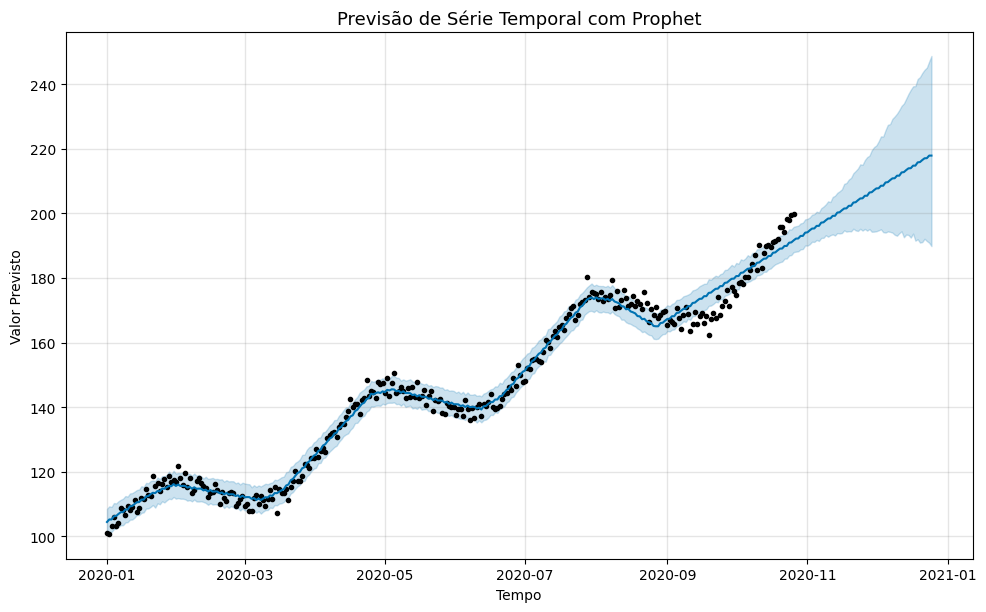

In [ ]:
from prophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Série simulada com tendência e sazonalidade
np.random.seed(42)
datas = pd.date_range("2020-01-01", periods=300)
valores = 100 + 0.3*np.arange(300) + 10*np.sin(np.arange(300)/15) + np.random.normal(0, 2, 300)
df = pd.DataFrame({"ds": datas, "y": valores})

# Modelo Prophet
modelo = Prophet()
modelo.fit(df)

# Geração de previsões para 60 dias futuros
futuro = modelo.make_future_dataframe(periods=60)
prev = modelo.predict(futuro)

# Plotagem
modelo.plot(prev)
plt.title("Previsão de Série Temporal com Prophet", fontsize=13)
plt.xlabel("Tempo")
plt.ylabel("Valor Previsto")
plt.show()


O Prophet gera automaticamente gráficos de tendência e sazonalidade, permitindo uma interpretação direta.  
Sua força está na simplicidade: com poucos comandos, obtém-se um modelo preditivo robusto e ajustável a novas observações.  

Em contrapartida, ele assume que a série pode ser representada como a soma de padrões relativamente estáveis — o que o torna menos eficiente em cenários altamente voláteis ou não periódicos.

---

### Comparando os modelos

| Modelo | Necessidade de Estacionariedade | Normalização | Vantagem Principal | Limitação |
|---------|--------------------------------|---------------|-------------------|------------|
| **LSTM** | Não | Sim | Aprende padrões complexos e não lineares | Exige dados e ajuste fino |
| **Prophet** | Não | Não | Interpretação simples e rápida | Supõe padrões regulares |
| **ARIMA/Holt-Winters** | Sim / Parcial | Não | Precisão em padrões lineares | Fraco em dados não lineares |

Essas abordagens computacionais permitem lidar com séries temporais reais, onde ruído, sazonalidade e irregularidades coexistem.  
O passo seguinte é **comparar o desempenho** de cada modelo usando métricas de erro (como MAE, RMSE e MAPE) e escolher a melhor alternativa para cada tipo de dado analisado.




---



# 6. Avaliação e Comparação de Modelos de Séries Temporais

Avaliar a qualidade de um modelo de previsão é tão importante quanto ajustá-lo.  
Mesmo quando o gráfico parece bom, é necessário quantificar o **erro de previsão** ou seja, o quanto o modelo erra em média ao tentar antecipar os valores futuros.  

Nesta etapa, serão apresentadas as principais métricas de avaliação e como utilizá-las na comparação entre diferentes modelos de séries temporais.


## 6.1 Principais Métricas de Erro

| Métrica | Nome completo | Interpretação | Quando usar |
|----------|----------------|----------------|--------------|
| **MAE** | Mean Absolute Error (Erro Médio Absoluto) | Média dos erros em valor absoluto; mostra o erro médio em unidades da variável. | Quando erros positivos e negativos devem ser tratados igualmente. |
| **RMSE** | Root Mean Squared Error (Raiz do Erro Quadrático Médio) | Penaliza erros grandes mais fortemente; sensível a outliers. | Quando grandes desvios são críticos para o sistema. |
| **MAPE** | Mean Absolute Percentage Error (Erro Percentual Médio Absoluto) | Mostra o erro médio em percentual; útil para interpretar resultados em escala relativa. | Quando a escala dos dados é importante e não há valores zero. |

Essas métricas ajudam a comparar diferentes modelos aplicados à mesma série.  
Quanto **menor** o valor da métrica, **melhor o desempenho preditivo**.


=== Desempenho ARIMA ===
MAE  : 0.997
RMSE : 1.273
MAPE : 1.58%

=== Desempenho LSTM ===
MAE  : 0.655
RMSE : 0.823
MAPE : 1.03%


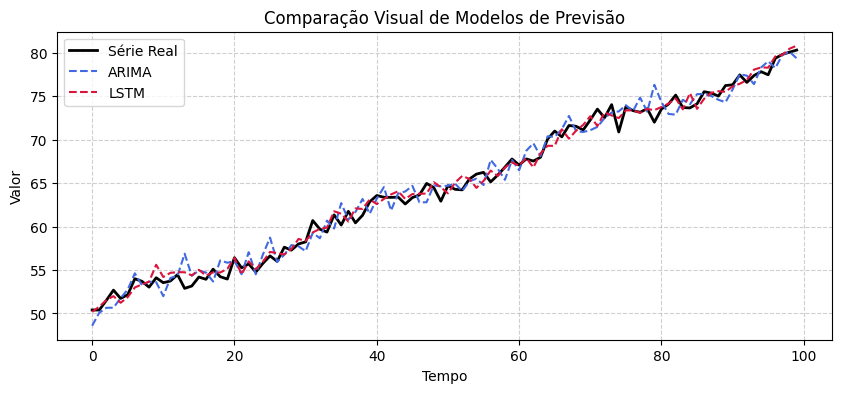

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Série de teste simulada
np.random.seed(42)
t = np.arange(100)
serie_real = 50 + 0.3*t + np.sin(t/5) + np.random.normal(0, 0.8, 100)

# Simulações de previsões de dois modelos
pred_arima = 50 + 0.3*t + np.sin(t/5) + np.random.normal(0, 1, 100)
pred_lstm  = 50 + 0.3*t + np.sin(t/5) + np.random.normal(0, 0.5, 100)

# Cálculo das métricas
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mae_arima = mean_absolute_error(serie_real, pred_arima)
rmse_arima = np.sqrt(mean_squared_error(serie_real, pred_arima))
mape_arima = mape(serie_real, pred_arima)

mae_lstm = mean_absolute_error(serie_real, pred_lstm)
rmse_lstm = np.sqrt(mean_squared_error(serie_real, pred_lstm))
mape_lstm = mape(serie_real, pred_lstm)

# Exibição comparativa
print("=== Desempenho ARIMA ===")
print(f"MAE  : {mae_arima:.3f}")
print(f"RMSE : {rmse_arima:.3f}")
print(f"MAPE : {mape_arima:.2f}%\n")

print("=== Desempenho LSTM ===")
print(f"MAE  : {mae_lstm:.3f}")
print(f"RMSE : {rmse_lstm:.3f}")
print(f"MAPE : {mape_lstm:.2f}%")

# Gráfico comparativo
plt.figure(figsize=(10,4))
plt.plot(serie_real, label="Série Real", color="black", linewidth=2)
plt.plot(pred_arima, label="ARIMA", color="royalblue", linestyle="--")
plt.plot(pred_lstm, label="LSTM", color="crimson", linestyle="--")
plt.title("Comparação Visual de Modelos de Previsão")
plt.xlabel("Tempo")
plt.ylabel("Valor")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


O resultado exibe os valores médios de erro para cada modelo e o gráfico permite avaliar visualmente qual deles se aproxima mais da série real.  

- O **MAE** mostra o erro médio absoluto, útil para comparar previsões na mesma unidade da variável.  
- O **RMSE** amplifica erros grandes, sendo ideal quando grandes desvios são inaceitáveis.  
- O **MAPE** indica o erro em percentual, facilitando comparações entre diferentes escalas de séries.

Se, por exemplo, o LSTM apresentar menor MAE e RMSE, isso indica que ele generalizou melhor o comportamento da série, mesmo sem pressupor linearidade.

## 6.2 Análise de Resíduos

Além das métricas numéricas, é essencial inspecionar os **resíduos**, que são as diferenças entre os valores reais e previstos:

$$
\text{resíduo}_t = y_t - \hat{y}_t
$$

Um modelo bem ajustado deve gerar resíduos **sem padrão aparente**, distribuídos aleatoriamente em torno de zero.  
Isso indica que a estrutura temporal foi bem capturada e o modelo não deixou informação útil “sobrando”.



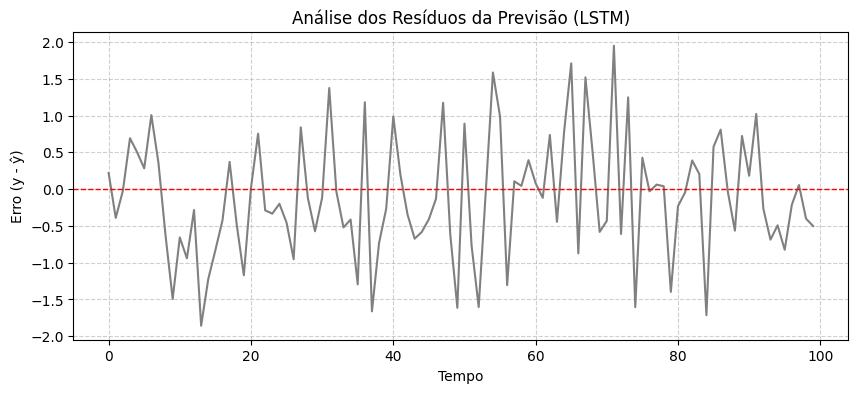

In [ ]:
# Cálculo e visualização dos resíduos do modelo LSTM simulado
residuos = serie_real - pred_lstm

plt.figure(figsize=(10,4))
plt.plot(residuos, color="gray")
plt.axhline(0, color="red", linestyle="--", linewidth=1)
plt.title("Análise dos Resíduos da Previsão (LSTM)")
plt.xlabel("Tempo")
plt.ylabel("Erro (y - ŷ)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


Se os resíduos apresentarem padrões visíveis, como tendência, periodicidade ou agrupamentos, significa que o modelo **não capturou totalmente** a estrutura dos dados.  
Nesse caso, pode ser necessário ajustar parâmetros, incorporar novas variáveis ou adotar um modelo híbrido.

---

## 6.3 Comparação Final entre Modelos

A avaliação quantitativa e visual permite resumir o desempenho dos métodos usados:

| Modelo | MAE ↓ | RMSE ↓ | MAPE ↓ | Resíduos aleatórios? | Interpretação |
|---------|--------|---------|---------|-----------------------|----------------|
| **ARIMA** | Médio | Médio | Médio | Parcialmente | Captura bem padrões lineares curtos. |
| **Holt-Winters** | Médio | Médio | Médio | Parcial | Adequado para sazonalidade regular. |
| **LSTM** | Baixo | Baixo | Baixo | Sim | Aprende relações não lineares e complexas. |
| **Prophet** | Médio | Médio | Médio | Sim | Fácil de ajustar, bom para previsões interpretáveis. |

Em síntese, **nenhum modelo é universalmente melhor**.  
O ideal é comparar várias abordagens e escolher aquela que oferece o **melhor equilíbrio entre precisão, interpretabilidade e custo computacional** para o contexto analisado.




---



# 7. Aplicações e Discussões

A análise e previsão de séries temporais têm papel fundamental na engenharia, na indústria e na ciência de dados.  
Mais do que prever valores futuros, o objetivo é compreender o comportamento do sistema e apoiar decisões baseadas em evidências.  
Quando aplicada corretamente, essa abordagem permite **reduzir incertezas, antecipar falhas e otimizar processos**.

---

## 7.1 Aplicações Práticas

### **1. Manutenção preditiva**
Em sistemas industriais, sensores coletam continuamente dados de **vibração, temperatura e corrente elétrica**.  
A partir dessas séries, é possível prever quando o equipamento começará a operar fora do padrão esperado, permitindo a substituição preventiva de componentes antes da falha.

*Exemplo prático:*  
Ao aplicar uma LSTM sobre leituras de vibração de um motor elétrico, é possível detectar aumentos sutis no ruído residual, antecipando desgaste no rolamento com dias de antecedência.

---

### **2. Controle e otimização de processos**
Em plantas industriais, as séries de **pressão, vazão ou temperatura** ajudam a calibrar sistemas de controle.  
Modelos como ARIMA e Holt-Winters permitem ajustar setpoints automaticamente, reduzindo desperdícios e aumentando a eficiência operacional.

*Exemplo prático:*  
O ARIMA ajusta a pressão de um sistema hidráulico de forma adaptativa, compensando oscilações que surgem por variações de carga ou temperatura ambiente.

---

### **3. Gestão de recursos e planejamento**
Séries temporais também são amplamente usadas em **planejamento energético, previsão de demanda e gestão de estoques**.  
Modelos como Prophet, que lidam bem com sazonalidade e eventos externos, são ideais para prever períodos de maior consumo ou escassez.

*Exemplo prático:*  
O Prophet identifica sazonalidade semanal no consumo de energia de uma fábrica, auxiliando o gestor a negociar contratos mais vantajosos com fornecedores.

---

## 7.2 Discussão sobre a Escolha de Modelos

A escolha do modelo depende das características da série e do objetivo da previsão.  
Cada abordagem possui pontos fortes e limitações específicas:

| Tipo de Modelo | Pontos Fortes | Limitações | Situações Ideais |
|-----------------|----------------|-------------|------------------|
| **ARIMA / SARIMA** | Boa interpretação estatística, ideal para relações lineares curtas | Exige estacionariedade | Séries estáveis e regulares |
| **Holt-Winters** | Simples e eficaz para sazonalidade constante | Sensível a ruídos e mudanças abruptas | Séries com ciclos regulares e previsíveis |
| **LSTM** | Capta padrões complexos e não lineares | Requer muitos dados e tempo de treinamento | Séries longas e com múltiplos padrões sobrepostos |
| **Prophet** | Interpretação visual e ajuste automático | Pode suavizar demais variações bruscas | Séries com tendências claras e sazonalidade previsível |

Em aplicações reais, é comum combinar técnicas: por exemplo, usar um modelo ARIMA para estimar a tendência e uma rede LSTM para aprender padrões residuais não lineares.  
Essas soluções híbridas unem **interpretação estatística** e **poder de aprendizado profundo**.

---

## 7.3 Considerações Finais

O estudo de séries temporais oferece uma ponte direta entre análise de dados e decisões práticas.  
Mais do que algoritmos, o processo envolve **entendimento do fenômeno**, **tratamento cuidadoso dos dados** e **interpretação criteriosa dos resultados**.  

De modo geral:

- A **visualização inicial** revela padrões e anomalias.  
- O **pré-processamento** garante estabilidade e comparabilidade.  
- A **modelagem** captura estrutura temporal e dependências.  
- A **avaliação** assegura que o modelo realmente aprendeu os comportamentos do sistema.  

Ao final, o analista ou engenheiro deve ser capaz de traduzir resultados numéricos em **ações concretas** — seja prever o consumo de energia, antecipar falhas em equipamentos ou planejar a produção com base em dados reais.

Essa integração entre teoria, modelagem e aplicação prática é o que transforma a análise de séries temporais em uma das ferramentas mais poderosas da ciência de dados moderna.




---



# 8. Encerramento

Ao longo desta aula, foi possível compreender os fundamentos da análise de séries temporais, desde a decomposição e tratamento até a modelagem e avaliação de previsões.  
Os modelos clássicos (Random Walk, ARIMA e Holt-Winters) mostraram como dependências lineares e padrões sazonais podem ser explorados de forma estatística, enquanto as abordagens computacionais (LSTM e Prophet) ampliaram as possibilidades para dados não lineares e comportamentos mais complexos.

Em resumo:
- **Tratamento e decomposição** permitem entender o comportamento interno da série.  
- **Estacionariedade e normalização** garantem estabilidade aos modelos.  
- **Modelos clássicos** são simples e interpretáveis.  
- **Modelos de IA** oferecem flexibilidade e aprendizado adaptativo.  
- **Avaliação e comparação** asseguram que as previsões sejam confiáveis.

O domínio dessas técnicas fornece base sólida para aplicações práticas em engenharia, ciência de dados e automação industrial, integrando estatística e inteligência artificial no suporte à decisão.

## Saiba Mais

Para aprofundar o estudo sobre modelagem de séries temporais, recomenda-se:

- HYNDMAN, R. J.; ATHANASOPOULOS, G. *Forecasting: Principles and Practice*. 3. ed. OTexts, 2021.  Link: https://otexts.com/fpp3/
- BOX, G. E. P.; JENKINS, G. M.; REINSEL, G. C.; LJUNG, G. M. *Time Series Analysis: Forecasting and Control*. 5. ed. Wiley, 2015.  Link: https://onlinelibrary.wiley.com/doi/10.1111/jtsa.12194?utm_source=researchgate
- CHOLLET, F. *Deep Learning with Python*. 2. ed. Manning, 2021.  Link: https://sourestdeeds.github.io/pdf/Deep%20Learning%20with%20Python.pdf
- TAYLOR, S. J.; LETHAM, B. *Forecasting at Scale*. *The American Statistician*, v. 72, n. 1, p. 37–45, 2018. Link: http://lethalletham.com/ForecastingAtScale.pdf

Essas obras trazem fundamentos teóricos e exemplos práticos complementares aos experimentos realizados nesta aula.
